In [1]:
import numpy as np
import glob
import scipy.integrate
import scipy.interpolate
import scipy.stats
import os
%matplotlib inline
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rc('text', usetex=True)

## Analysis of CG Surface hopping for ALA4
Tristan Bereau (MPIP, 2018)

All units of the free energy surfaces (FES) in $k_{\rm B}T$.

## AA

/Users/bereau/soft/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


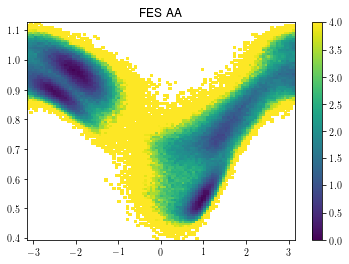

In [2]:
timeSer_aa = np.genfromtxt('aa_traj.dat')
x, y = timeSer_aa.T[0]*np.pi/180, timeSer_aa.T[1]
H_aa, xedges, yedges = np.histogram2d(x, y, bins=100, normed=True)
H_aa = H_aa.T
X, Y = np.meshgrid(xedges, yedges)
fes_aa = -np.ma.log(H_aa/H_aa.max())
plt.pcolormesh(X, Y, fes_aa, vmax=4.0)
plt.colorbar()
plt.title("FES AA")
plt.show()

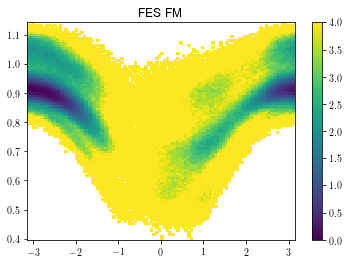

In [3]:
timeSer_fm = np.genfromtxt('fm_traj.dat')
x, y = timeSer_fm.T[0]*np.pi/180, timeSer_fm.T[1]
H_fm, xedges, yedges = np.histogram2d(x, y, bins=100, normed=True)
H_fm = H_fm.T
X, Y = np.meshgrid(xedges, yedges)
fes_fm = -np.ma.log(H_fm/H_fm.max())
plt.pcolormesh(X, Y, fes_fm, vmax=4.0)
plt.colorbar()
plt.title("FES FM")
plt.show()

## CG iter-gYBG with 1-4 interaction

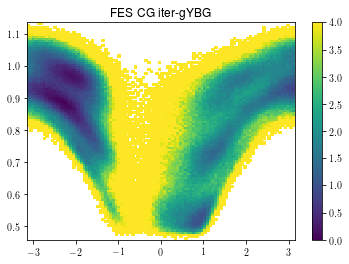

In [4]:
timeSer_gYBG = np.genfromtxt('1state_w14/cvs_time.dat')
x, y = timeSer_gYBG.T[4], timeSer_gYBG.T[1]
H_gYBG, xedges, yedges = np.histogram2d(x, y, bins=100, normed=True)
H_gYBG = H_gYBG.T
X, Y = np.meshgrid(xedges, yedges)
fes_gYBG = -np.ma.log(H_gYBG/H_gYBG.max())
plt.pcolormesh(X, Y, fes_gYBG, vmax=4.0)
plt.colorbar()
plt.title("FES CG iter-gYBG")
plt.show()

MAE(iter-gYBG vs AA): 1.109 kT


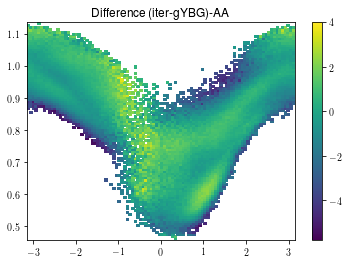

In [5]:
fesgYBGaa = (fes_gYBG-fes_aa).compressed()
mae_gYBGaa = np.mean([abs(fesgYBGaa[i]) for i in range(len(fesgYBGaa))])
print "MAE(iter-gYBG vs AA): {:.3f} kT".format(mae_gYBGaa)

plt.pcolormesh(X, Y, fes_gYBG - fes_aa, vmax=4.0)
plt.title("Difference (iter-gYBG)-AA")
plt.colorbar()
plt.show()

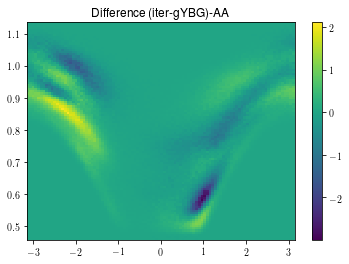

In [6]:
plt.pcolormesh(X, Y, H_gYBG - H_aa)
plt.title("Difference (iter-gYBG)-AA")
plt.colorbar()
plt.show()

## CG Surface Hop 2S

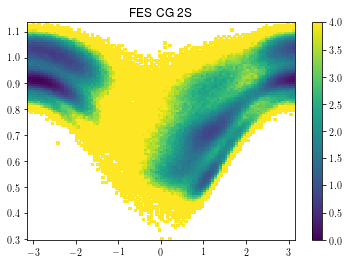

In [7]:
timeSer_2s = np.genfromtxt('2states_w14/cvs_time.dat')
x, y = timeSer_2s.T[4], timeSer_2s.T[1]
H_2s, xedges, yedges = np.histogram2d(x, y, bins=100, normed=True)
H_2s = H_2s.T
X, Y = np.meshgrid(xedges, yedges)
fes_2s = -np.ma.log(H_2s/H_2s.max())
plt.pcolormesh(X, Y, fes_2s, vmax=4.0)
plt.colorbar()
plt.title("FES CG 2S")
plt.show()

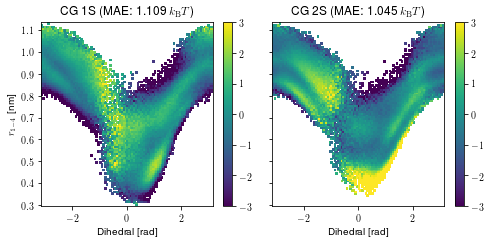

In [8]:
fesgYBGaa = (fes_gYBG-fes_aa).compressed()
mae_gYBGaa = np.mean([abs(fesgYBGaa[i]) for i in range(len(fesgYBGaa))])
fes2saa = (fes_2s-fes_aa).compressed()
mae_2saa = np.mean([abs(fes2saa[i]) for i in range(len(fes2saa))])

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(7,3.5))
ax1.set_xlabel("Dihedral [rad]")
ax2.set_xlabel("Dihedral [rad]")
ax1.set_ylabel("$r_{1-4}$ [nm]")
ax1.set_title("CG 1S (MAE: "+str(np.around(mae_gYBGaa, decimals=3))+" $k_{\mathrm{B}}T$)")
ax2.set_title("CG 2S (MAE: "+str(np.around(mae_2saa, decimals=3))+" $k_{\mathrm{B}}T$)")
# ax1.set_ylim([1.4,np.pi])
im1 = ax1.pcolormesh(X, Y, fes_gYBG - fes_aa, vmin=-3, vmax=3)
f.colorbar(im1, ax=ax1)
im2 = ax2.pcolormesh(X, Y, fes_2s - fes_aa, vmin=-3, vmax=3)
f.colorbar(im2, ax=ax2)
f.tight_layout()
plt.show()
f.savefig('deltasurfs_1-2.pdf', bbox_inches='tight')

/Users/bereau/soft/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


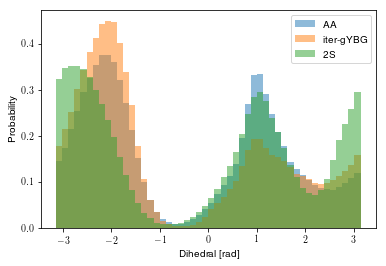

In [9]:
fig = plt.figure()
n, bins, patches = plt.hist(timeSer_aa.T[0]*np.pi/180, bins=50, normed=1, label='AA', alpha=0.5)
n, bins, patches = plt.hist(timeSer_gYBG.T[4], bins=50, normed=1, label='iter-gYBG', alpha=0.5)
n, bins, patches = plt.hist(timeSer_2s.T[4], bins=50, normed=1, label='2S', alpha=0.5)
plt.legend(loc='upper right')
plt.xlabel('Dihedral [rad]')
plt.ylabel('Probability')
plt.show()
fig.savefig('dihed_dist-2.pdf', bbox_inches='tight')

## CG Surface Hop 3S

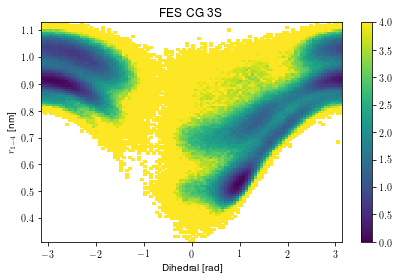

In [10]:
timeSer_3s = np.genfromtxt('3states_w14/cvs_time.dat')
x, y = timeSer_3s.T[4], timeSer_3s.T[1]
H_3s, xedges, yedges = np.histogram2d(x, y, bins=100, normed=True)
H_3s = H_3s.T
X, Y = np.meshgrid(xedges, yedges)
fes_3s = -np.ma.log(H_3s/H_3s.max())
fig = plt.figure()
plt.pcolormesh(X, Y, fes_3s, vmax=4.0)
plt.colorbar()
plt.xlabel("Dihedral [rad]")
plt.ylabel("$r_{1-4}$ [nm]")
plt.title("FES CG 3S")
plt.tight_layout()
plt.show()
fig.savefig('fes_3s.pdf', bbox_inches='tight')

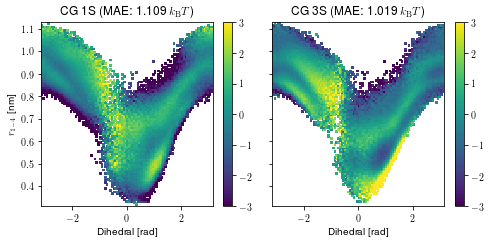

In [11]:
fesgYBGaa = (fes_gYBG-fes_aa).compressed()
mae_gYBGaa = np.mean([abs(fesgYBGaa[i]) for i in range(len(fesgYBGaa))])
fes3saa = (fes_3s-fes_aa).compressed()
mae_3saa = np.mean([abs(fes3saa[i]) for i in range(len(fes3saa))])

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(7,3.5))
ax1.set_xlabel("Dihedral [rad]")
ax2.set_xlabel("Dihedral [rad]")
ax1.set_ylabel("$r_{1-4}$ [nm]")
ax1.set_title("CG 1S (MAE: "+str(np.around(mae_gYBGaa, decimals=3))+" $k_{\mathrm{B}}T$)")
ax2.set_title("CG 3S (MAE: "+str(np.around(mae_3saa, decimals=3))+" $k_{\mathrm{B}}T$)")
# ax1.set_ylim([1.4,np.pi])
im1 = ax1.pcolormesh(X, Y, fes_gYBG - fes_aa, vmin=-3, vmax=3)
f.colorbar(im1, ax=ax1)
im2 = ax2.pcolormesh(X, Y, fes_3s - fes_aa, vmin=-3, vmax=3)
f.colorbar(im2, ax=ax2)
f.tight_layout()
plt.show()
f.savefig('deltasurfs_1-3.pdf', bbox_inches='tight')

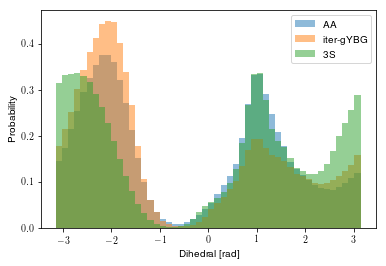

In [12]:
fig = plt.figure()
n, bins, patches = plt.hist(timeSer_aa.T[0]*np.pi/180, bins=50, normed=1, label='AA', alpha=0.5)
n, bins, patches = plt.hist(timeSer_gYBG.T[4], bins=50, normed=1, label='iter-gYBG', alpha=0.5)
n, bins, patches = plt.hist(timeSer_3s.T[4], bins=50, normed=1, label='3S', alpha=0.5)
plt.legend(loc='upper right')
plt.xlabel('Dihedral [rad]')
plt.ylabel('Probability')
plt.show()
fig.savefig('dihed_dist-3.pdf', bbox_inches='tight')

# CG Surface Hop 4S

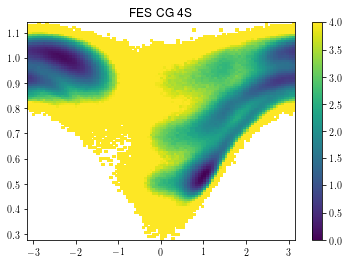

In [13]:
timeSer_4s = np.genfromtxt('4states_w14/cvs_time.dat')
x, y = timeSer_4s.T[4], timeSer_4s.T[1]
H_4s, xedges, yedges = np.histogram2d(x, y, bins=100, normed=True)
H_4s = H_4s.T
X4, Y4 = np.meshgrid(xedges, yedges)
fes_4s = -np.ma.log(H_4s/H_4s.max())
plt.pcolormesh(X4, Y4, fes_4s, vmax=4.0)
plt.colorbar()
plt.title("FES CG 4S")
plt.show()

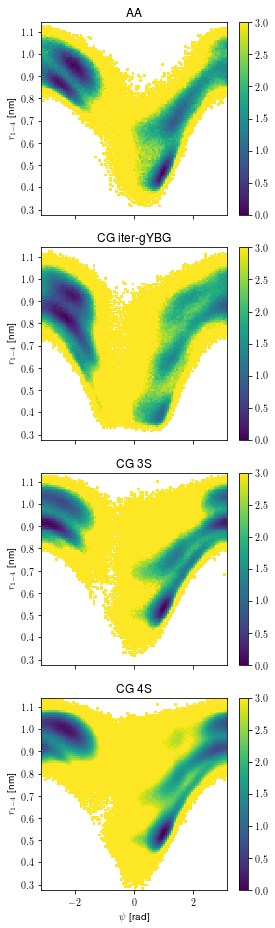

In [14]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharey=True, sharex=True, figsize=(4,13))
ax4.set_xlabel("$\\psi$ [rad]")
ax1.set_ylabel("$r_{1-4}$ [nm]")
ax2.set_ylabel("$r_{1-4}$ [nm]")
ax3.set_ylabel("$r_{1-4}$ [nm]")
ax4.set_ylabel("$r_{1-4}$ [nm]")
ax1.set_title("AA   ")
ax2.set_title("CG iter-gYBG")
ax3.set_title("CG 3S")
ax4.set_title("CG 4S")
maxkT = 3.0
im1 = ax1.pcolormesh(X, Y, fes_aa, vmin=0, vmax=maxkT)
f.colorbar(im1, ax=ax1)
im2 = ax2.pcolormesh(X, Y, fes_gYBG, vmin=0, vmax=maxkT)
f.colorbar(im2, ax=ax2)
im3 = ax3.pcolormesh(X, Y, fes_3s, vmin=0, vmax=maxkT)
f.colorbar(im3, ax=ax3)
im4 = ax4.pcolormesh(X4, Y4, fes_4s, vmin=0, vmax=maxkT)
f.colorbar(im4, ax=ax4)
f.tight_layout()
plt.show()
f.savefig('fes_aa-gYBG-3s-4s.pdf', bbox_inches='tight')

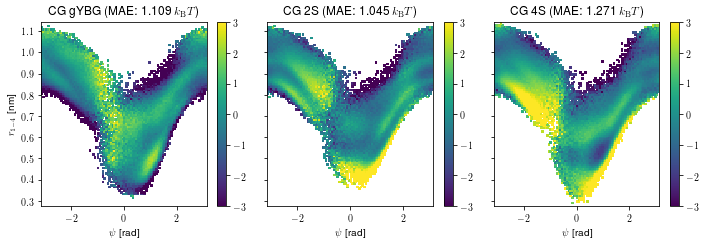

In [15]:
fesgYBGaa = (fes_gYBG-fes_aa).compressed()
mae_gYBGaa = np.mean([abs(fesgYBGaa[i]) for i in range(len(fesgYBGaa))])
fes2saa = (fes_2s-fes_aa).compressed()
mae_2saa = np.mean([abs(fes2saa[i]) for i in range(len(fes2saa))])
fes4saa = (fes_4s-fes_aa).compressed()
mae_4saa = np.mean([abs(fes4saa[i]) for i in range(len(fes4saa))])

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(10,3.5))
ax1.set_xlabel("$\\psi$ [rad]")
ax2.set_xlabel("$\\psi$ [rad]")
ax3.set_xlabel("$\\psi$ [rad]")
ax1.set_ylabel("$r_{1-4}$ [nm]")
ax1.set_title("CG gYBG (MAE: "+str(np.around(mae_gYBGaa, decimals=3))+" $k_{\mathrm{B}}T$)")
ax2.set_title("CG 2S (MAE: "+str(np.around(mae_2saa, decimals=3))+" $k_{\mathrm{B}}T$)")
ax3.set_title("CG 4S (MAE: "+str(np.around(mae_4saa, decimals=3))+" $k_{\mathrm{B}}T$)")
im1 = ax1.pcolormesh(X, Y, fes_gYBG - fes_aa, vmin=-3, vmax=3)
f.colorbar(im1, ax=ax1)
im2 = ax2.pcolormesh(X, Y, fes_2s - fes_aa, vmin=-3, vmax=3)
f.colorbar(im2, ax=ax2)
im3 = ax3.pcolormesh(X4, Y4, fes_4s - fes_aa, vmin=-3, vmax=3)
f.colorbar(im3, ax=ax3)
f.tight_layout()
plt.show()
f.savefig('deltasurfs_1-4.pdf', bbox_inches='tight')

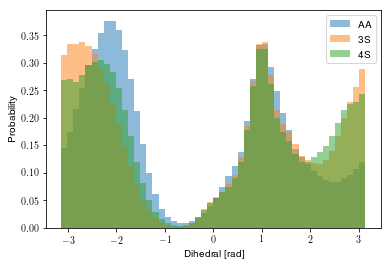

In [16]:
fig = plt.figure()
n, bins, patches = plt.hist(timeSer_aa.T[0]*np.pi/180, bins=50, normed=1, label='AA', alpha=0.5)
# n, bins, patches = plt.hist(timeSer_fm.T[3], bins=50, normed=1, label='FM', alpha=0.1)
n, bins, patches = plt.hist(timeSer_3s.T[4], bins=50, normed=1, label='3S', alpha=0.5)
n, bins, patches = plt.hist(timeSer_4s.T[4], bins=50, normed=1, label='4S', alpha=0.5)
plt.legend(loc='upper right')
plt.xlabel('Dihedral [rad]')
plt.ylabel('Probability')
plt.show()
fig.savefig('dihed_dist-4.pdf', bbox_inches='tight')

In [17]:
# AA
hist = np.histogram(timeSer_aa.T[0]*np.pi/180, bins='auto', normed=1)
x = [hist[0], 0.5*(hist[1][1:]+hist[1][:-1])]
np.savetxt('hist_aa_a.dat', np.array([x[1], x[0]]).T)
# CG
for mod in ["gYBG","2s","4s"]:
    hist = np.histogram(eval('timeSer_'+mod).T[4], bins='auto', normed=1)
    x = [hist[0], 0.5*(hist[1][1:]+hist[1][:-1])]
    fname = 'hist_'+mod+'_a.dat'
    np.savetxt(fname, np.array([x[1], x[0]]).T)

In [19]:
# Save FESs
def save_fes(filename, fes):
    open(filename, "w").close()
    fo = open(filename, "w")
    for i in range(len(X[0])-1):
        for j in range(len(Y.T[0])-1):
            xbin = X[0][j]+0.5*(X[0][j+1]-X[0][j])
            ybin = Y.T[0][i]+0.5*(Y.T[0][i+1]-Y.T[0][i])
            fo.write("{:.3f} {:.3f} {:.3f}\n".format(xbin, ybin,float(fes[i,j])))
        fo.write("\n")
    fo.close()

save_fes("fes_aa.dat", fes_aa)
save_fes("fes_fm.dat", fes_fm)
save_fes("fes_gYBG.dat", fes_gYBG)
save_fes("fes_2s.dat", fes_2s)
save_fes("fes_3s.dat", fes_3s)
save_fes("fes_4s.dat", fes_4s)
save_fes("fes_fm-aa.dat", fes_fm-fes_aa)
save_fes("fes_gybg-aa.dat", fes_gYBG-fes_aa)
save_fes("fes_2s-aa.dat", fes_2s-fes_aa)
save_fes("fes_3s-aa.dat", fes_3s-fes_aa)
save_fes("fes_4s-aa.dat", fes_4s-fes_aa)

/Users/bereau/soft/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: UserWarning: Warning: converting a masked element to nan.
